<h1>Potato Disease Classification</h1>

#### By Samrat Mitra (https://github.com/lionelsamrat10/)

Dataset Credit: [https://www.kaggle.com/arjuntejaswi/plant-village](https://www.kaggle.com/arjuntejaswi/plant-village)

There are three type of images, present in the dataset:

1. Potato Leaves with Early Blight disease
2. Normal or Healthy Potato leaves
3. Potato Leaves with Late Blight disease

In this project, our goal is to predict whether an image of a potato leaf, provided by the user is healthy or having early or late blight disease.

## Import necessary modules

In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

## Set all the Constants

In [25]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCH = 50

## Import data (images) into tensorflow dataset object

We will use image_dataset_from_directory api to load all images in tensorflow dataset: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

In [26]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


### Exploring all the image classes

In [27]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

### Find the length of the dataset (Here we will length in number of batches)

In [28]:
len(dataset) # Actual length 68 * 32 because images are in a batch of 32

68

### Displaying the image properties

In [36]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[0 0 2 1 0 0 0 1 0 1 0 0 0 2 2 0 0 0 1 0 1 0 0 0 2 0 1 1 0 1 0 1]


As you can see above, each element in the dataset is a tuple. First element is a batch of 32 elements of images. Second element is a batch of 32 elements of class labels

## Visualize some of the images from our dataset

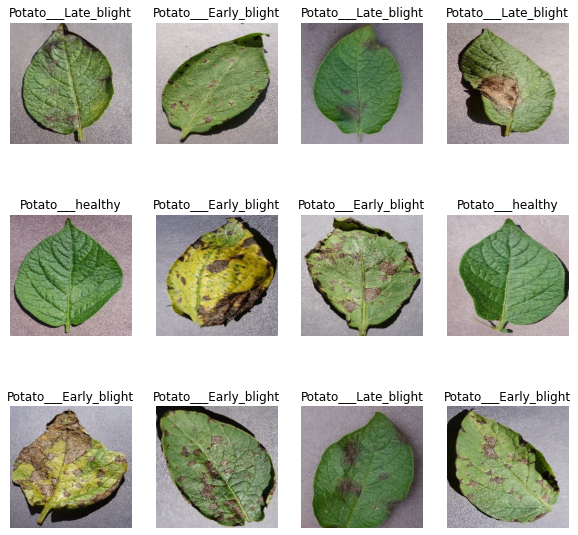

In [29]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8")) # image_batch[0] returns a tensor and using numpy() we are converting it to a numpy array
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

## Function to Split Dataset into Training and Test dataset

Dataset should be bifurcated into 3 subsets, namely:

1. Training: Dataset to be used while training
2. Validation: Dataset to be tested against while training
3. Test: Dataset to be tested against after we trained a model

In [30]:
train_size= 0.8
len(dataset) * train_size

54.400000000000006

In [31]:
train_ds = dataset.take(54)
len(train_ds)

54

In [32]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [33]:
val_size = 0.1
len(dataset) * val_size

6.800000000000001

In [34]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [35]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [37]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [38]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [40]:
print(len(test_ds)) # It has 8 batches i.e. 8 * 32 = 256

8


In [42]:
print(len(train_ds))

54


In [43]:
print(len(val_ds))

6


## Optimize the performance of our training 

Using Caching and Prefetching for the optimization of traing performance of our model

In [47]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE) # Read image from disk and cache it into memory
# If CPU or GPU is busy with loading images, the prefetch() will fetch the next batch of images
# We are letting Tensorflow to determine how many batches to prefetch
# The dataset is now optimised for training performance
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

### Resize and rescale the image

In [49]:
# Firstly: Resizing the image to 256 px * 256 px
# Secondly: Rescaling the image from the scale of (0 to 255) to the scale of (0 to 1)
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

### Applying Data Augmentation to our images

We will perform different transformation techniques such as Horizontal Flip, Zooming, Changing Contrast of the images, Rotation of the images and create multiple transformed images from our dataset. This will make our model more robust.

In [ ]:
tf.keras.Sequential([
    
])